#Google Colab для совместной работы в Python
Google Colab можно использовать для совместной работы по анализу и визуализации данных. Элементы кода можно снабжать комментариями на языке Markdown и совместно комментировать. 

Рассмотрим несложный пример загрузки данных с ЕМИСС. В нашем случае, это будет статистика разводов. Спавним разводы в двух крупнейших городах страны со средним значением по стране. Для того, чтобы исключить влияние миграции и смертности используем расчёт разводов на 100 тысяч населения за год.

После того, как мы скачали файл, мы можем сохранить его на своём Google диске. Мы не сможем использовать файл с диска пока не авторизируемся. [Вот инструкция как это сделать.](https://colab.research.google.com/notebooks/io.ipynb)


In [0]:
from google.colab import drive #загружаем специальную библиотеку 
drive.mount('/content/drive') #авторизируемся

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Pandas — загружаю библиотеку
Для предварительной работы нам нужна всего лишь одна библиотека: Pandas. Благодаря ей мы сможем манипулировать данными, как если бы мы использовали табличный редактор. Эта же библиотека позволяет нам сделать минималистичную визуализацию для предварительного просмотра.

In [0]:
import pandas as pd #импорт библиотеки pandas. в будущем обращение к этой библиотеке будет происходить по сокращённому имени pd

##read_excel — читаю файл
С помощью функции read_excel мы можем загрузить файл Microsoft Excel. Перед обращением к функции мы упоменаем библиотеку. Загруженный файл я кладу в переменную df. Она может называться как угодно, но если вы посмотрите специальные сайты или видеоуроки, то заметите, что такое сокращение общепринято. Оно обозначает слово data frame — так называется особая форма хранения в памяти компьютера табличных данных.

###skiprows
Внутри файла, который мы скачали первые две строки являются лишними и нам их нужно пропустить, иначе наш датафрейм не идентифицирует названия столбцов должным образом. Для этого мы указываем число строк, которые нужно игнорировать при загрузке.

Если я хочу увидеть таблицу, достаточно написать df. Pandas покажет несколько начальных и несколько последних строк таблицы. Такая форма отображения полезна, когда данных много. Таким образом, осуществляется предварительный просмотр.


In [0]:
df = pd.read_excel(r'/content/drive/My Drive/2020/20_DATAVIZ/Family20/Число разводов в расчете на 1000 населения за год.xls', skiprows=2)
df

,Unnamed: 0,Unnamed: 1,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Российская Федерация,все население,3.8,4.0,4.3,4.5,4.6,4.5,3.8,3.8,3.4,3.7,4.3,5.3,6.0,5.5,4.4,4.2,4.5,4.8,4.9,4.9,4.5,4.7,4.5,4.7,4.7,4.2,4.1,4.2,4.0
1,Российская Федерация,городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.7,4.9,5.0,4.4,4.4,4.4,4.2
2,Российская Федерация,сельское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,3.8,4.0,4.1,3.4,3.4,3.4,3.2
3,Центральный федеральный округ,все население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.5,5.4,5.8,5.3,4.5,4.3,4.4,4.7,4.9,4.9,4.4,4.5,4.3,4.5,4.6,4.1,4.1,4.2,3.9
4,Центральный федеральный округ,городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,4.4,4.6,4.6,4.2,4.2,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Северо-Кавказский район,все население,3.8,3.9,3.9,4.1,4.2,4.1,3.6,3.5,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,Уральский район,все население,3.1,3.4,3.8,4.0,4.2,4.2,3.5,3.5,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,Западно-Сибирский район,все население,3.9,4.2,4.5,4.6,4.8,4.9,4.0,4.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,Восточно-Сибирский район,все население,3.3,3.6,3.8,3.9,4.0,4.0,3.2,3.0,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##rename — переименовываю столбцы
В первой строке нашей таблицы, которую pandas определил как названия отсутствовали данные для имён первых двух столбцов. Нужно заменить автоматические названия на подходящие по смыслу определения.

In [0]:
df.rename(columns = {"Unnamed: 0":"Регион", "Unnamed: 1":"Население"}, inplace=True)
df

,Регион,Население,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Российская Федерация,все население,3.8,4.0,4.3,4.5,4.6,4.5,3.8,3.8,3.4,3.7,4.3,5.3,6.0,5.5,4.4,4.2,4.5,4.8,4.9,4.9,4.5,4.7,4.5,4.7,4.7,4.2,4.1,4.2,4.0
1,Российская Федерация,городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.7,4.9,5.0,4.4,4.4,4.4,4.2
2,Российская Федерация,сельское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,3.8,4.0,4.1,3.4,3.4,3.4,3.2
3,Центральный федеральный округ,все население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.5,5.4,5.8,5.3,4.5,4.3,4.4,4.7,4.9,4.9,4.4,4.5,4.3,4.5,4.6,4.1,4.1,4.2,3.9
4,Центральный федеральный округ,городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,4.4,4.6,4.6,4.2,4.2,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Северо-Кавказский район,все население,3.8,3.9,3.9,4.1,4.2,4.1,3.6,3.5,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,Уральский район,все население,3.1,3.4,3.8,4.0,4.2,4.2,3.5,3.5,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,Западно-Сибирский район,все население,3.9,4.2,4.5,4.6,4.8,4.9,4.0,4.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,Восточно-Сибирский район,все население,3.3,3.6,3.8,3.9,4.0,4.0,3.2,3.0,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##loc — забираю из таблицы столбец
С помощью этой функции можно забрать любые колонки из таблицы. Мне нужен полный список упоминаемых регионов, который я назову regions.

In [0]:
regions = df.loc[:,"Регион"] #забираем столбик "Регион" в виде "серии" данных
regions

0                   Российская Федерация
1                   Российская Федерация
2                   Российская Федерация
3          Центральный федеральный округ
4          Центральный федеральный округ
                     ...                
320              Северо-Кавказский район
321                      Уральский район
322              Западно-Сибирский район
323             Восточно-Сибирский район
324                Дальневосточный район
Name: Регион, Length: 325, dtype: object

##drop_duplicates — удаляю дубрикаты
Теперь в серии мы удаляем дубликаты. Импользуем функцию rop_duplicates без каки-либо дополнительных настроек.


In [0]:
regions = regions.drop_duplicates() #удаление дубликатов
regions

0                   Российская Федерация
3          Центральный федеральный округ
6                   Белгородская область
9                       Брянская область
12                  Владимирская область
                     ...                
320              Северо-Кавказский район
321                      Уральский район
322              Западно-Сибирский район
323             Восточно-Сибирский район
324                Дальневосточный район
Name: Регион, Length: 119, dtype: object

##str.contains — ищу совпадения
Я хочу из серии имён регионов РФ забрать только Москву, Санкт-Петербург и средние данные для Росии. Я создаю логическую операцию, которая ищет серию подходящих наименований. Мне не нужно точное совпадение, а лишь совпадение части написания. Для этого используется функция contains перед которой нужно написать str. Это означает, что обращаемся к строкам объекта regions. Только на них сработает функция contains. Тут мои познания в основах информатики заканчиваются и тонкости работы с объектами и функциями кажутся абракадаброй. Я просто запомнил и использовал это заклинание :) На выходе получил серию filter, где перечислены совпадения или расхождения логических операций.

In [0]:
filter = regions.str.contains("Москва|Российская|Петербург")
filter

0       True
3      False
6      False
9      False
12     False
       ...  
320    False
321    False
322    False
323    False
324    False
Name: Регион, Length: 119, dtype: bool

##Фильтр серии данных
Если в квадратных скобках указать серию сравнений, то в новой серии регионов останутся только те элементы где содержались соответствующие фрагменты слов. Мы создаём новую серию данных regions_f с точными именами.

Обратите внимание, что названия регионов оформлены причудливым образом: с большим количеством ненужных пробелов и с длинными формулировками названий городов. Что поделать, в таком виде публикуется статистика.

In [0]:
regions_f = regions[filter]
regions_f

0                                  Российская Федерация
57            Город Москва столица Российской Федера...
99            Город Санкт-Петербург город федерально...
Name: Регион, dtype: object

##Фильтр фрейма данных
Теперь мы фильтруем по столбцу "Регион" нашу таблицу df. Для этого используется функция isin, где в скобках указывается ранее созданная серия данных. Функция loc нам уже знакома. Только теперь мы забираем не столбцы, а строки.

In [0]:
df = df.loc[df['Регион'].isin(regions_f)]
df

,Регион,Население,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Российская Федерация,все население,3.8,4.0,4.3,4.5,4.6,4.5,3.8,3.8,3.4,3.7,4.3,5.3,6.0,5.5,4.4,4.2,4.5,4.8,4.9,4.9,4.5,4.7,4.5,4.7,4.7,4.2,4.1,4.2,4.0
1,Российская Федерация,городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.7,4.9,5.0,4.4,4.4,4.4,4.2
2,Российская Федерация,сельское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,3.8,4.0,4.1,3.4,3.4,3.4,3.2
57,Город Москва столица Российской Федера...,все население,4.8,4.9,4.7,5.1,4.9,4.6,5.1,5.1,5.0,5.0,4.6,4.8,4.9,4.5,4.3,4.0,4.1,4.3,4.3,4.2,3.9,3.8,3.6,3.8,3.7,3.6,3.5,3.6,3.5
58,Город Москва столица Российской Федера...,городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,3.6,3.8,3.8,3.6,3.5,3.6,3.5
59,Город Москва столица Российской Федера...,сельское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.6,1.6,1.9,2.3,2.6,2.8,2.8
99,Город Санкт-Петербург город федерально...,все население,5.5,5.4,5.7,5.8,5.5,5.1,4.4,4.9,4.6,5.0,5.7,6.5,7.0,6.8,5.2,4.8,5.0,5.4,5.6,5.5,5.1,5.2,4.9,5.2,5.2,4.7,4.8,4.7,4.8
100,Город Санкт-Петербург город федерально...,городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,4.9,5.2,5.2,4.7,4.8,4.7,4.8
101,Город Санкт-Петербург город федерально...,сельское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Простейший фильтр строк по данным в избранном столбце
Не всегда нужно так заморачиваться и использовать списки для фильтрации. Достаточно просто упомянуть нужный параметр в конкретном столбце. Для этого не нужна функция. Просто в квадратных скобках укажите логическое условие. Например, выберем "все население" в столбце "Население".

In [0]:
df = df[df["Население"] == "все население"]
df

,Регион,Население,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Российская Федерация,все население,3.8,4.0,4.3,4.5,4.6,4.5,3.8,3.8,3.4,3.7,4.3,5.3,6.0,5.5,4.4,4.2,4.5,4.8,4.9,4.9,4.5,4.7,4.5,4.7,4.7,4.2,4.1,4.2,4.0
57,Город Москва столица Российской Федера...,все население,4.8,4.9,4.7,5.1,4.9,4.6,5.1,5.1,5.0,5.0,4.6,4.8,4.9,4.5,4.3,4.0,4.1,4.3,4.3,4.2,3.9,3.8,3.6,3.8,3.7,3.6,3.5,3.6,3.5
99,Город Санкт-Петербург город федерально...,все население,5.5,5.4,5.7,5.8,5.5,5.1,4.4,4.9,4.6,5.0,5.7,6.5,7.0,6.8,5.2,4.8,5.0,5.4,5.6,5.5,5.1,5.2,4.9,5.2,5.2,4.7,4.8,4.7,4.8


##drop — удаление столбца
Столбец, который нам не нужен можно удалить.

In [0]:
df = df.drop(["Население"], axis = 1)
df

,Регион,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Российская Федерация,3.8,4.0,4.3,4.5,4.6,4.5,3.8,3.8,3.4,3.7,4.3,5.3,6.0,5.5,4.4,4.2,4.5,4.8,4.9,4.9,4.5,4.7,4.5,4.7,4.7,4.2,4.1,4.2,4.0
57,Город Москва столица Российской Федера...,4.8,4.9,4.7,5.1,4.9,4.6,5.1,5.1,5.0,5.0,4.6,4.8,4.9,4.5,4.3,4.0,4.1,4.3,4.3,4.2,3.9,3.8,3.6,3.8,3.7,3.6,3.5,3.6,3.5
99,Город Санкт-Петербург город федерально...,5.5,5.4,5.7,5.8,5.5,5.1,4.4,4.9,4.6,5.0,5.7,6.5,7.0,6.8,5.2,4.8,5.0,5.4,5.6,5.5,5.1,5.2,4.9,5.2,5.2,4.7,4.8,4.7,4.8


##set_index — индекс из столбца
Названия строк (обычно это цифры) называют индексом. Он используется для выделения данных. Мы планируем транспонировать таблицу, чтобы годы стали индексом строк, а названия регионов названием столбцов. Сейчас самое время сделать их индексом.

In [0]:
df = df.set_index("Регион")
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Регион,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Российская Федерация,3.8,4.0,4.3,4.5,4.6,4.5,3.8,3.8,3.4,3.7,4.3,5.3,6.0,5.5,4.4,4.2,4.5,4.8,4.9,4.9,4.5,4.7,4.5,4.7,4.7,4.2,4.1,4.2,4.0
Город Москва столица Российской Федерации город федерального значения,4.8,4.9,4.7,5.1,4.9,4.6,5.1,5.1,5.0,5.0,4.6,4.8,4.9,4.5,4.3,4.0,4.1,4.3,4.3,4.2,3.9,3.8,3.6,3.8,3.7,3.6,3.5,3.6,3.5
Город Санкт-Петербург город федерального значения,5.5,5.4,5.7,5.8,5.5,5.1,4.4,4.9,4.6,5.0,5.7,6.5,7.0,6.8,5.2,4.8,5.0,5.4,5.6,5.5,5.1,5.2,4.9,5.2,5.2,4.7,4.8,4.7,4.8


## Очистка имени индекса
В процессе поворота таблицы, которое нужно сделать в следующем действии, имя столбца "Регион", которое стало именем всех индексов может помешать. Удаляю его.

In [0]:
del df.index.name
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Российская Федерация,3.8,4.0,4.3,4.5,4.6,4.5,3.8,3.8,3.4,3.7,4.3,5.3,6.0,5.5,4.4,4.2,4.5,4.8,4.9,4.9,4.5,4.7,4.5,4.7,4.7,4.2,4.1,4.2,4.0
Город Москва столица Российской Федерации город федерального значения,4.8,4.9,4.7,5.1,4.9,4.6,5.1,5.1,5.0,5.0,4.6,4.8,4.9,4.5,4.3,4.0,4.1,4.3,4.3,4.2,3.9,3.8,3.6,3.8,3.7,3.6,3.5,3.6,3.5
Город Санкт-Петербург город федерального значения,5.5,5.4,5.7,5.8,5.5,5.1,4.4,4.9,4.6,5.0,5.7,6.5,7.0,6.8,5.2,4.8,5.0,5.4,5.6,5.5,5.1,5.2,4.9,5.2,5.2,4.7,4.8,4.7,4.8


##Поворот таблицы
Выполняем любимую операцию. Поворачиваем таблицу на 90 градусов.

In [0]:
df = df.transpose()
df

,Российская Федерация,Город Москва столица Российской Федерации город федерального значения,Город Санкт-Петербург город федерального значения
1990,3.8,4.8,5.5
1991,4.0,4.9,5.4
1992,4.3,4.7,5.7
1993,4.5,5.1,5.8
1994,4.6,4.9,5.5
1995,4.5,4.6,5.1
1996,3.8,5.1,4.4
1997,3.8,5.1,4.9
1998,3.4,5.0,4.6
1999,3.7,5.0,5.0


##Переименование столбцов
В ручном режиме делаем заголовки лаконичнее. Нам это поможет в легенде визуализации.

In [0]:
df = df.rename(columns={
    "Российская Федерация": "Россия", 
    "        Город Москва столица Российской Федерации город федерального значения": "Москва",
    "        Город Санкт-Петербург город федерального значения":"Санкт-Петербург"
})
df

,Россия,Москва,Санкт-Петербург
1990,3.8,4.8,5.5
1991,4.0,4.9,5.4
1992,4.3,4.7,5.7
1993,4.5,5.1,5.8
1994,4.6,4.9,5.5
1995,4.5,4.6,5.1
1996,3.8,5.1,4.4
1997,3.8,5.1,4.9
1998,3.4,5.0,4.6
1999,3.7,5.0,5.0


##Визуализация
Строю три линейных графика самым простым способом. Добавляю заголовок визуализации.

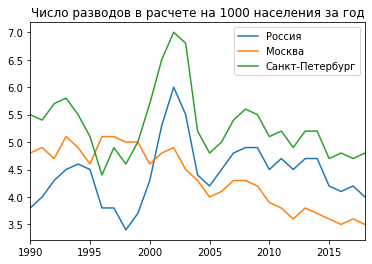

In [0]:
df.plot.line(title="Число разводов в расчете на 1000 населения за год")

##Автоматизация
Обилие комментариев и большое количество просмотров таблиц не даёт полного представления о количестве шагов и как-бы выглядел этот код в чистом виде. Давайте применим те же операции но уже к другой идентичной таблице. Вы увидите, что поменяв всего лишь пару фрагментов кода мы получим аналогичный результат с некоторыми вариациями. Это позволяет значительно экономить время.

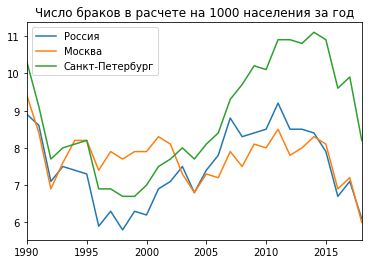

In [0]:
df2 = pd.read_excel(r'/content/drive/My Drive/2020/20_DATAVIZ/Family20/Число браков в расчете на 1000 населения за год.xls', skiprows=2)
df2.rename(columns = {"Unnamed: 0":"Регион", "Unnamed: 1":"Население"}, inplace=True)
regions = df2.loc[:,"Регион"]
regions = pd.Series(regions)
regions = regions.drop_duplicates()
filter = regions.str.contains("Москва|Российская|Петербург")
regions_f = regions[filter]
df2 = df2.loc[df2['Регион'].isin(regions_f)]
df2 = df2[df2["Население"] == "все население"]
df2 = df2.drop(["Население"], axis = 1)
df2 = df2.set_index("Регион")
del df2.index.name
df2 = df2.transpose()
df2 = df2.rename(columns={
    "Российская Федерация": "Россия", 
    "        Город Москва столица Российской Федерации город федерального значения": "Москва",
    "        Город Санкт-Петербург город федерального значения":"Санкт-Петербург"
})
df2.plot.line(title="Число браков в расчете на 1000 населения за год")


##Финальный штрих
И в завершение, посмотрите как легко взять из двух источников данные и объединить в одну таблицу. Теперь мы можем сравнить статистику в разных регионах.

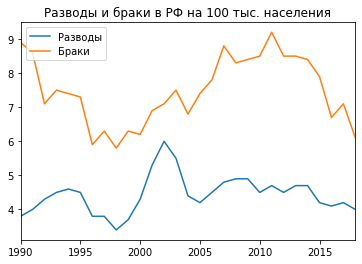

In [0]:
r = df.loc[:,"Россия"]
b = df2.loc[:,"Россия"]
rus = {"Разводы":r,"Браки":b}
rus = pd.DataFrame(rus)
rus.plot.line(title="Разводы и браки в РФ на 100 тыс. населения")

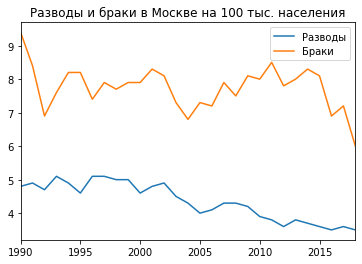

In [0]:
rm = df.loc[:,"Москва"]
bm = df2.loc[:,"Москва"]
mos = {"Разводы":rm,"Браки":bm}
mos = pd.DataFrame(mos)
mos.plot.line(title="Разводы и браки в Москве на 100 тыс. населения")

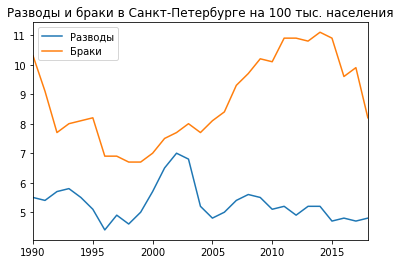

In [0]:
rb = df.loc[:,"Санкт-Петербург"]
bb = df2.loc[:,"Санкт-Петербург"]
pb = {"Разводы":rb,"Браки":bb}
pb = pd.DataFrame(pb)
pb.plot.line(title="Разводы и браки в Санкт-Петербурге на 100 тыс. населения")